# IRIS DATASET

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv('iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Link to dataset: https://www.kaggle.com/uciml/iris/downloads/Iris.csv/2

In [3]:
set(list(data['Species']))

{'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'}

In [4]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


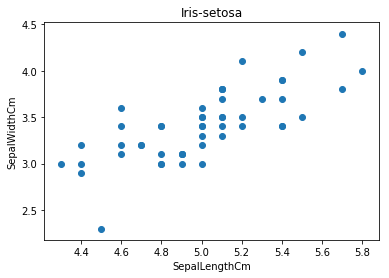

In [5]:
setosa=data[0:50]
plt.scatter(setosa['SepalLengthCm'],setosa['SepalWidthCm'])

plt.title('Iris-setosa')
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')

plt.show()

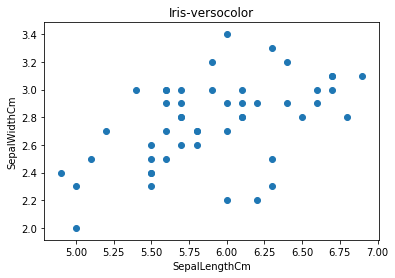

In [6]:
versocolor=data[51:100]
plt.scatter(versocolor['SepalLengthCm'],versocolor['SepalWidthCm'])

plt.title('Iris-versocolor')
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')

plt.show()

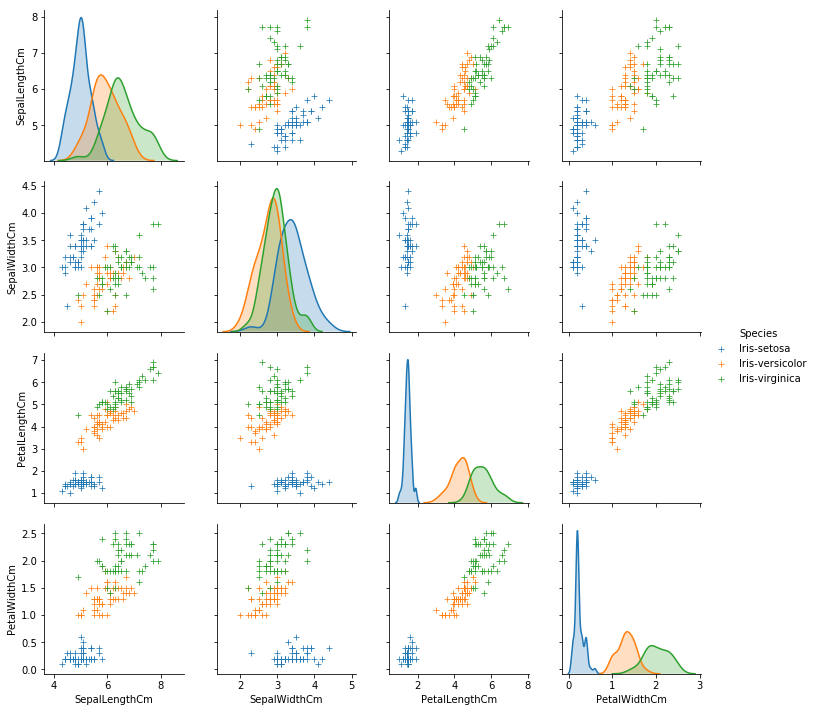

In [7]:
import seaborn as sns
tmp = data.drop('Id', axis=1)
g = sns.pairplot(tmp, hue='Species', markers='+')
plt.show()

In [8]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

labelencoder=LabelEncoder()
data['Species']=labelencoder.fit_transform(data['Species'])
data=data.drop(columns=['Id'])
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


one hot encoded (species) and removed id and it doesnot 

In [9]:
data.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

x=data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y=data['Species']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=44)
print("training data set:",x_train.shape)
print("testing data set:",x_test.shape)

training data set: (100, 4)
testing data set: (50, 4)


In [11]:
results=pd.DataFrame(columns=['Classifier','r2score','MSE'])
results.head()

,Classifier,r2score,MSE


In [12]:
from sklearn.linear_model import LinearRegression

lm=LinearRegression()
lm.fit(x_train,y_train)
yhat=lm.predict(x_test)
r2score=r2_score(yhat,y_test)
mse=mean_squared_error(yhat,y_test)
print("r2score",r2score)
print('Mean squared error:',mse)
results=results.append(pd.Series(['Regression',r2score,mse],index=results.columns ),ignore_index=True) 

r2score 0.9269385251543234
Mean squared error: 0.045263920644404425


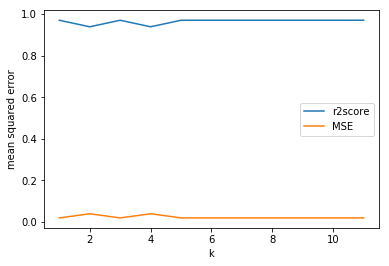

In [13]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

x1axes,x2axes=[],[]

for i in range(1,12):
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(x_train,y_train)
    yhat=neigh.predict(x_test)
    x1axes.append(r2_score(yhat,y_test))
    x2axes.append(mean_squared_error(yhat,y_test))

plt.plot(list(range(1,12)),x1axes,label="r2score")
plt.plot(list(range(1,12)),x2axes,label="MSE")
plt.xlabel('k')
plt.ylabel('mean squared error')
plt.legend()
plt.show()

In [14]:
results=results.append(pd.Series(['K nearest neighbours',max(x1axes),min(x2axes)],index=results.columns ),ignore_index=True) 

In [15]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=0)
clf.fit(x_train,y_train)
yhat=clf.predict(x_test)
r2score=r2_score(yhat,y_test)
mse=mean_squared_error(yhat,y_test)
print("r2score",r2score)
print('Mean squared error:',mse)
print("cross val score:",cross_val_score(clf, x_train, y_train, cv=10).mean())
results=results.append(pd.Series(['Decision Tree',r2score,mse],index=results.columns ),ignore_index=True) 

r2score 0.9705188679245284
Mean squared error: 0.02
cross val score: 0.9395959595959595


In [16]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=0,C=1.0, solver='lbfgs',multi_class='multinomial')
lr.fit(x_train, y_train)
yhat=lr.predict(x_test)
r2score=r2_score(yhat,y_test)
mse=mean_squared_error(yhat,y_test)
print("r2score",r2score)
print('Mean squared error:',mse)
results=results.append(pd.Series(['Logistic Regression',r2score,mse],index=results.columns ),ignore_index=True) 
print("score:",lr.score(x_train, y_train))


r2score 0.9705188679245284
Mean squared error: 0.02
score: 0.94


C:\Users\vivek\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [17]:
from sklearn.svm import SVC

svc = SVC(gamma='auto')
svc.fit(x_train, y_train)
yhat=svc.predict(x_test)
r2score=r2_score(yhat,y_test)
mse=mean_squared_error(yhat,y_test)
print("r2score",r2score)
print('Mean squared error:',mse)
results.append(pd.Series(['SVC',r2score,mse],index=results.columns ),ignore_index=True) 

r2score 0.9705188679245284
Mean squared error: 0.02


,Classifier,r2score,MSE
0,Regression,0.926939,0.045264
1,K nearest neighbours,0.970519,0.020000
2,Decision Tree,0.970519,0.020000
3,Logistic Regression,0.970519,0.020000
4,SVC,0.970519,0.020000


In [18]:
results

,Classifier,r2score,MSE
0,Regression,0.926939,0.045264
1,K nearest neighbours,0.970519,0.020000
2,Decision Tree,0.970519,0.020000
3,Logistic Regression,0.970519,0.020000


<b>CONCLUSIONS</b>
<ul>
    <li>1.Other classification algorithms work better in most of the cases than Regression</li>
    <li>2.Every dataset has outliers which affects accuracy (97%)<br>
</ul>

<h5>REASON FOR CONCLUSION 2 </h5>

In [19]:
x_test['predicted']=yhat
x_test['actual']=y_test
condition=x_test['predicted']!=x_test['actual']
x_test[condition]

C:\Users\vivek\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\vivek\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,predicted,actual
106,4.9,2.5,4.5,1.7,1,2


In [20]:
x_train['predicted']=svc.predict(x_train)
x_train['actual']=y_train
condition=x_train['predicted']!=x_train['actual']
x_train[condition]

C:\Users\vivek\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\vivek\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,predicted,actual
138,6.0,3.0,4.8,1.8,1,2
126,6.2,2.8,4.8,1.8,1,2
77,6.7,3.0,5.0,1.7,2,1
83,6.0,2.7,5.1,1.6,2,1


These are outliers of dataset


<h1>Better performance features</h1>

1.using petals and sepals seperately<br>
2.plotting a corrletion heat map

In [21]:
from sklearn import metrics
petal=data[['PetalLengthCm','PetalWidthCm','Species']]
sepal=data[['SepalLengthCm','SepalWidthCm','Species']]

In [22]:
train_p,test_p=train_test_split(petal,test_size=0.3,random_state=0)  #petals
train_x_p=train_p[['PetalWidthCm','PetalLengthCm']]
train_y_p=train_p.Species
test_x_p=test_p[['PetalWidthCm','PetalLengthCm']]
test_y_p=test_p.Species


train_s,test_s=train_test_split(sepal,test_size=0.3,random_state=0)  #Sepal
train_x_s=train_s[['SepalWidthCm','SepalLengthCm']]
train_y_s=train_s.Species
test_x_s=test_s[['SepalWidthCm','SepalLengthCm']]
test_y_s=test_s.Species

In [23]:
model=SVC()
model.fit(train_x_p,train_y_p) 
prediction=model.predict(test_x_p) 
print('The accuracy of the SVM using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model=SVC()
model.fit(train_x_s,train_y_s) 
prediction=model.predict(test_x_s) 
print('The accuracy of the SVM using Sepal is:',metrics.accuracy_score(prediction,test_y_s))


The accuracy of the SVM using Petals is: 0.9777777777777777
The accuracy of the SVM using Sepal is: 0.8


C:\Users\vivek\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\vivek\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


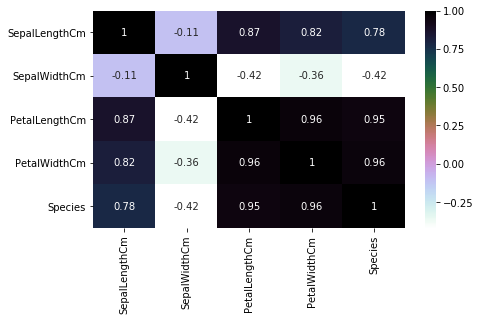

In [24]:
plt.figure(figsize=(7,4)) 
sns.heatmap(data.corr(),annot=True,cmap='cubehelix_r') #draws  heatmap with input as the correlation matrix calculted by(iris.corr())
plt.show()

This shows petal length and width are highly correlated but not sepal length and width